## Librerias

In [1]:
import sys
sys.path.append('../')
import funciones as fun
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
from empiricaldist import Cdf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from hyperopt import hp, fmin, tpe, Trials

In [2]:
from importlib import reload
import funciones  

# Recargar el módulo
reload(funciones)

<module 'funciones' from 'c:\\Users\\maria\\Desktop\\Business data\\2º Curso\\Casos practicos\\Reto 8\\R8_Naranja\\Modelado\\..\\funciones.py'>

## Lectura datos

In [4]:
comp_b = pd.read_csv('../Datos/Originales/Comp_B.csv')

In [ ]:
comp_b.head()

,Presion,Temperatura,Frecuencia,Potencia_Medida
0,0.746369,13.7,25.883513,90.247441
1,0.746888,13.7,30.497513,94.649142
2,0.747145,13.6,32.975970,97.726040
3,0.747433,13.6,34.000000,99.546341
4,0.747617,13.5,34.000000,101.412499


## Estandarizar el df

In [ ]:
x = comp_b.iloc[:,:-1]
y = comp_b.iloc[:, -1]

In [ ]:
# Estandarizar el dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X, columns=x.columns)

In [ ]:
# Guardo el scaler
with open('Modelos/Comp_b/scaler_model.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Train Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 44)

# Análisis de las variables

In [ ]:
y.describe()

count    45966.000000
mean        88.683290
std         22.105677
min         50.394369
25%         68.197637
50%         84.429360
75%        106.868053
max        130.714054
Name: Potencia_Medida, dtype: float64

In [ ]:
x.describe()

,Presion,Temperatura,Frecuencia
count,45966.000000,45966.000000,45966.000000
mean,0.756487,12.457936,24.500749
std,0.008911,6.390871,24.536416
min,0.733322,-2.400000,0.000000
25%,0.748004,7.900000,1.000000
50%,0.756621,11.900000,18.000000
75%,0.763981,16.400000,39.057050
max,0.778551,38.300000,100.000000


In [ ]:
fun.graficar_correlaciones(X, y)

# Gráfico de distribución

c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



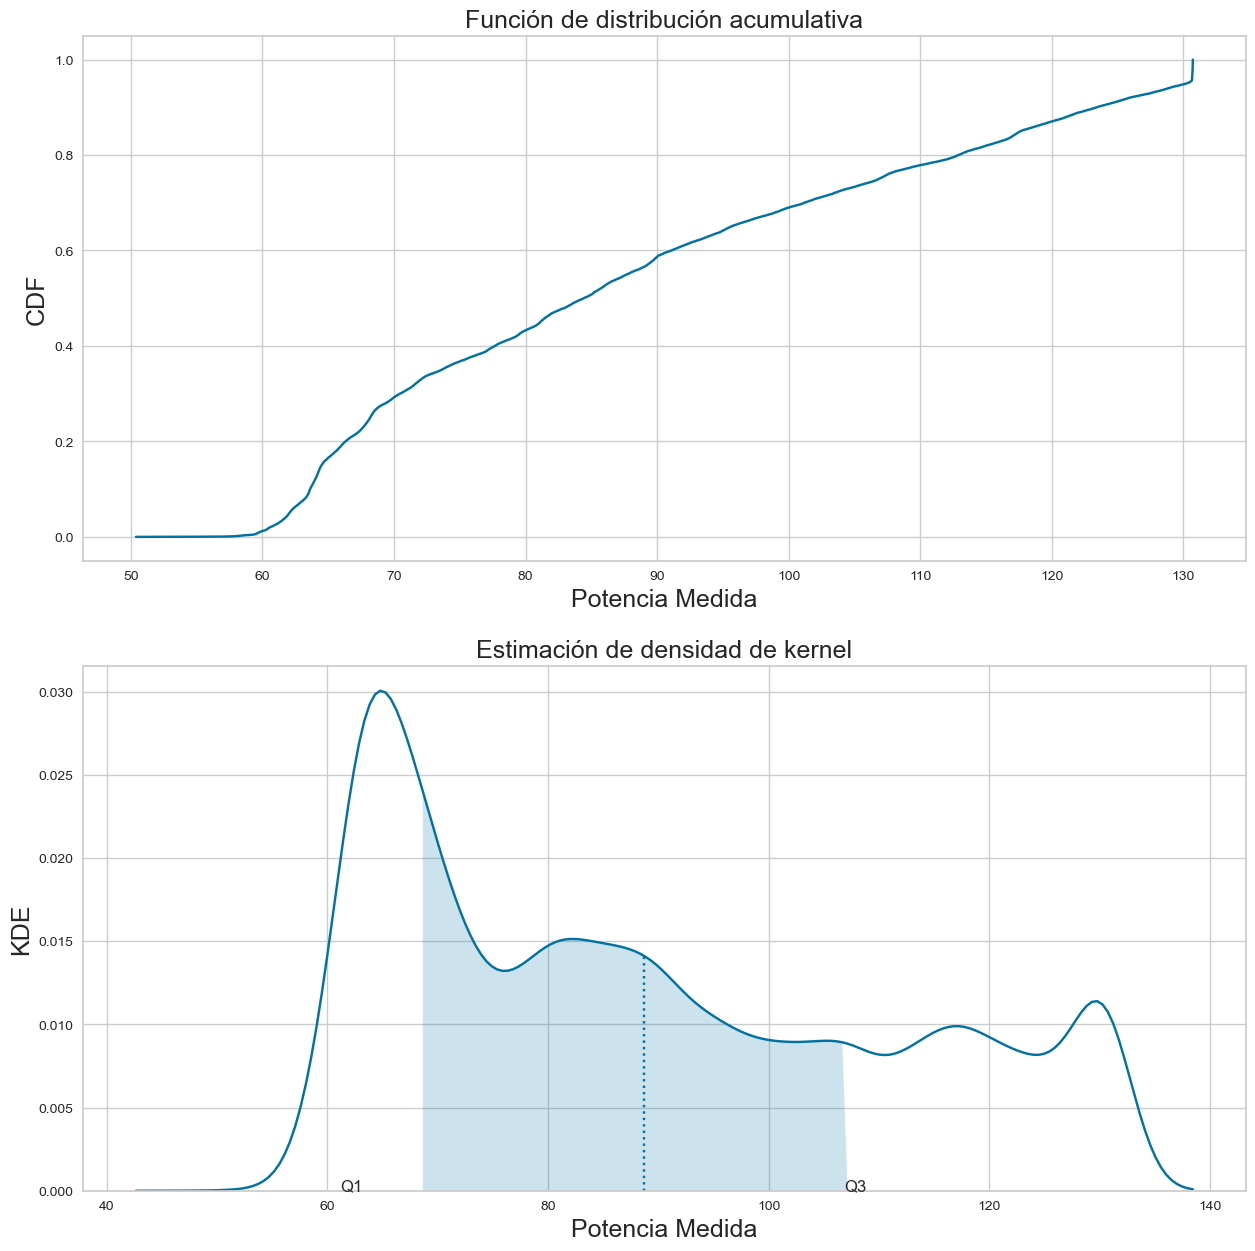

In [ ]:
fun.grafico_distribucion(y)

## Modelos Base

In [ ]:
compresor = 'b'

In [ ]:
modelos = [
    ('LinearRegression', LinearRegression()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('ElasticNet', ElasticNet()),
    ('RandomForestRegressor', RandomForestRegressor(random_state=42, n_jobs=-1)),
    ('SVR', SVR(kernel='linear')),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=44)),
    ('TweedieRegressor', TweedieRegressor()),
    ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=44))
]

LinearRegression - TRAIN = R^2: 0.9628949681213117, RMSE: 4.255748043374338
 TEST = R^2: 0.9639517479208892, RMSE: 4.2063742762640315


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



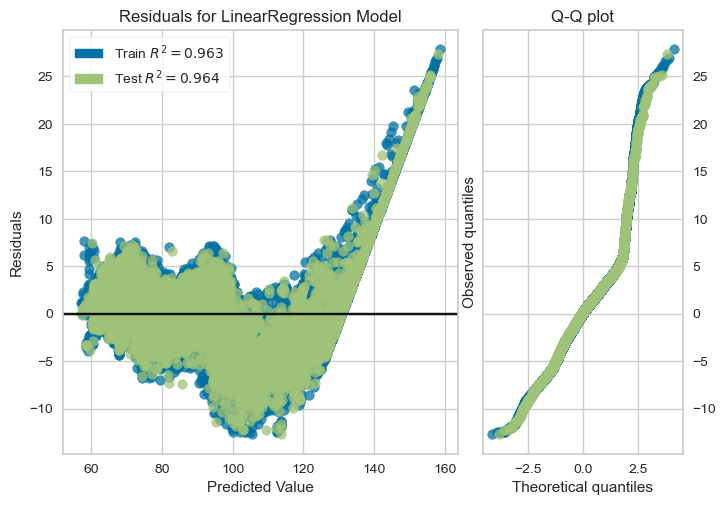

Lasso - TRAIN = R^2: 0.9143146595310782, RMSE: 6.466879567543415
 TEST = R^2: 0.9145143519445808, RMSE: 6.477574422346642


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but Lasso was fitted with feature names



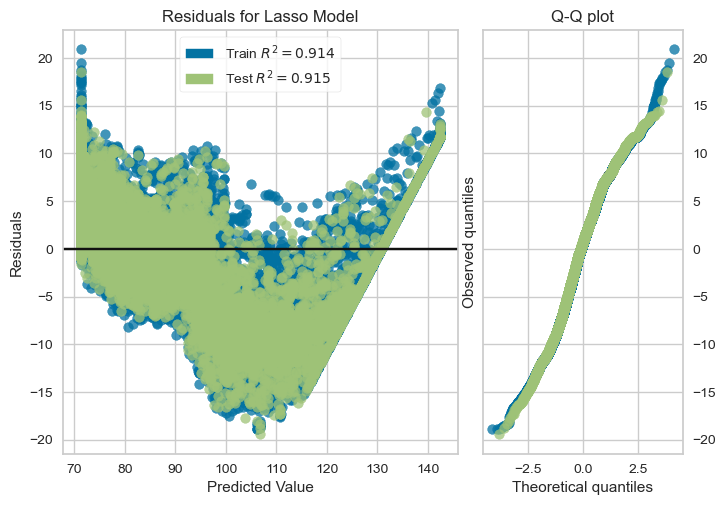

Ridge - TRAIN = R^2: 0.9628946217143456, RMSE: 4.2557673686680895
 TEST = R^2: 0.9639497826887037, RMSE: 4.206488933549376


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but Ridge was fitted with feature names



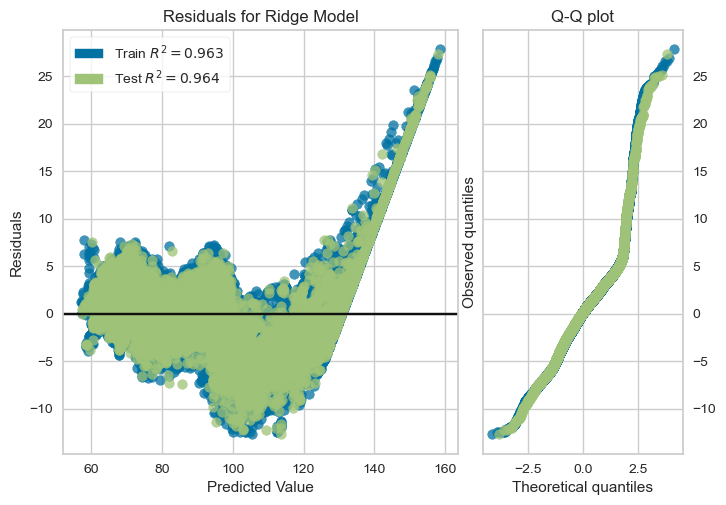

ElasticNet - TRAIN = R^2: 0.18172112179256084, RMSE: 19.984293199874887
 TEST = R^2: 0.18218938408654062, RMSE: 20.035130662514725


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but ElasticNet was fitted with feature names



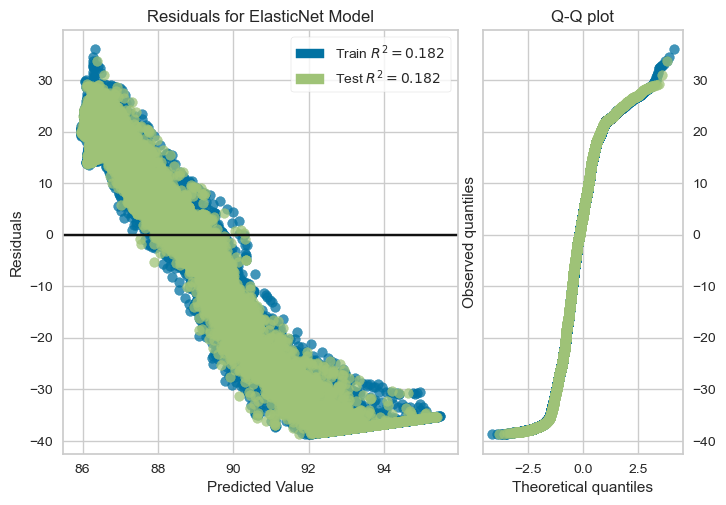

RandomForestRegressor - TRAIN = R^2: 0.995450124301682, RMSE: 1.4900844874906927
 TEST = R^2: 0.9954555914906554, RMSE: 1.4934974636685672


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



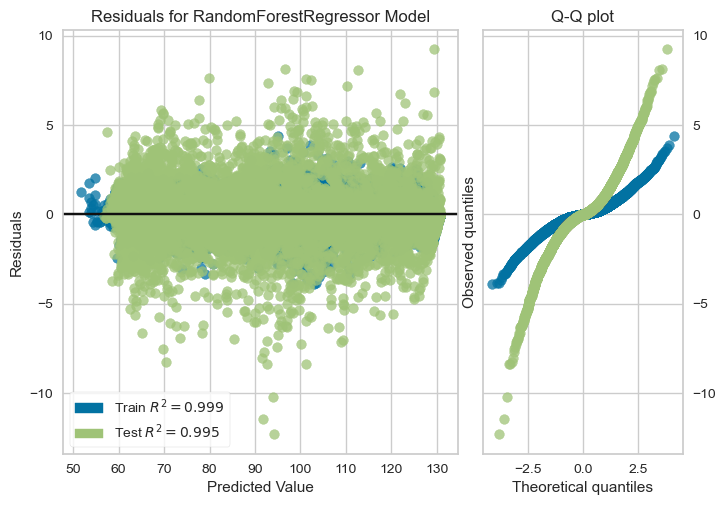

SVR - TRAIN = R^2: 0.9572004623153644, RMSE: 4.57072569220731
 TEST = R^2: 0.9581862119589947, RMSE: 4.530285413124106


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



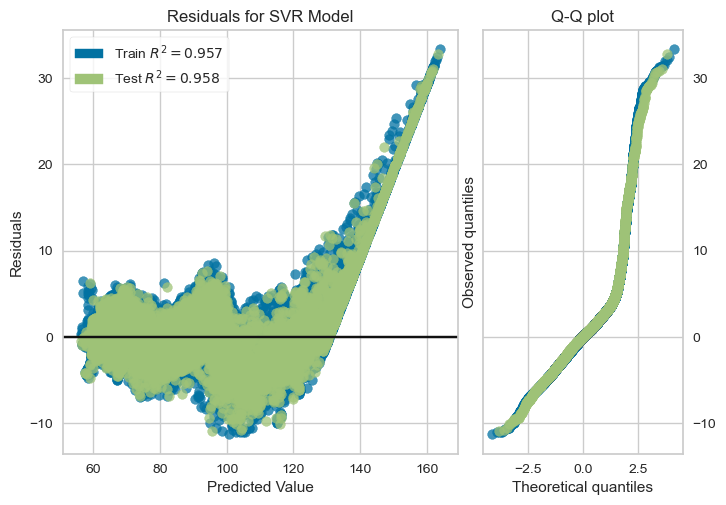

KNeighborsRegressor - TRAIN = R^2: 0.9950996596408173, RMSE: 1.546478346520904
 TEST = R^2: 0.99536694406951, RMSE: 1.5079938790684004


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



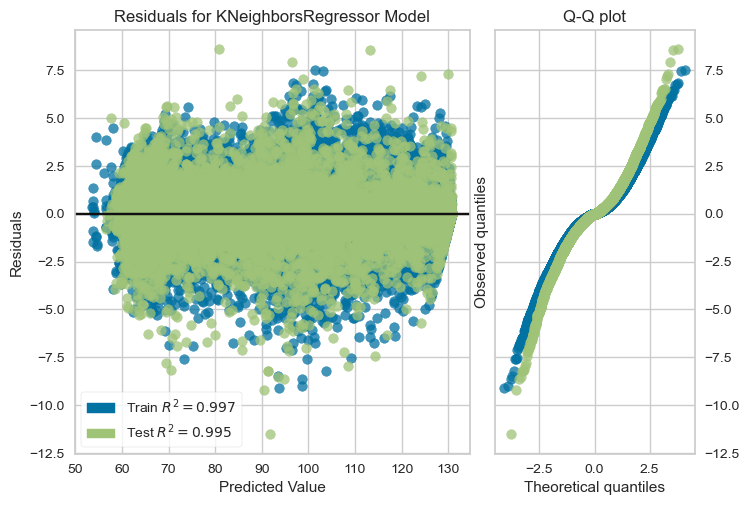

DecisionTreeRegressor - TRAIN = R^2: 0.9921775452688599, RMSE: 1.9537099982888442
 TEST = R^2: 0.9921104209582601, RMSE: 1.967853316092232


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



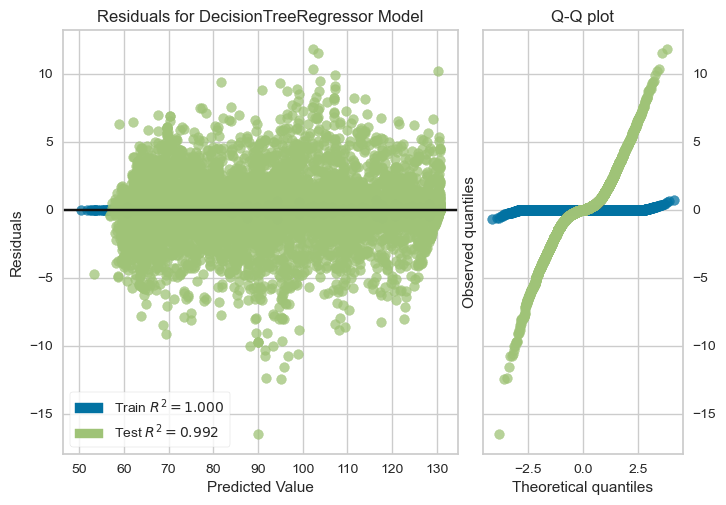

TweedieRegressor - TRAIN = R^2: 0.11104009744606884, RMSE: 20.829506082496074
 TEST = R^2: 0.1115126295727803, RMSE: 20.882930187682682


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but TweedieRegressor was fitted with feature names



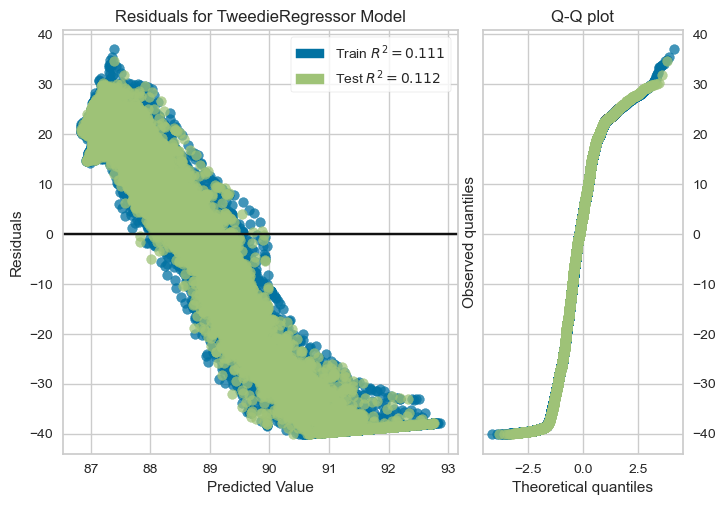

GradientBoostingRegressor - TRAIN = R^2: 0.9932141765452306, RMSE: 1.8197852138151631
 TEST = R^2: 0.9933743053545269, RMSE: 1.8033561932454247


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



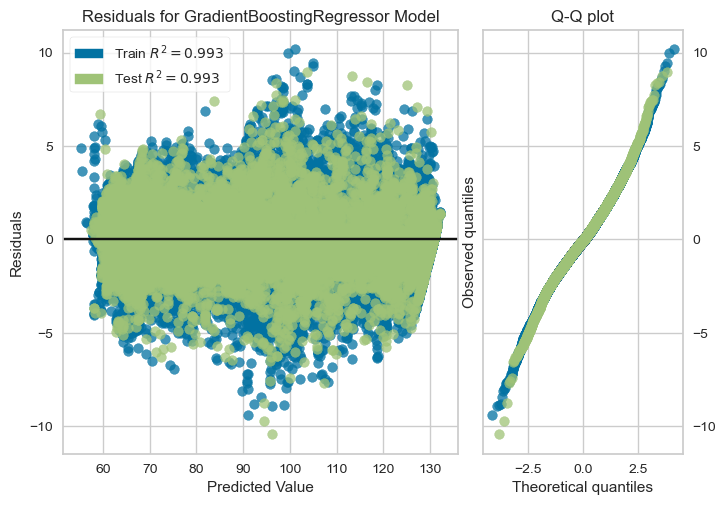

In [ ]:
metricas_modelos = {}

for nombre_modelo, modelo in modelos:
    metricas_modelos[nombre_modelo] = fun.evaluar_modelo(modelo, nombre_modelo, compresor, X_train, y_train, X_test, y_test)

## OPTIMIZACIÓN DE HIPERPARÁMETROS

In [ ]:
space = {
    'n_estimators': hp.randint('n_estimators', 50, 300),
    'max_features': hp.choice('max_features', [None, 'sqrt', 'log2']),
    'max_depth': hp.randint('max_depth', 1, 20),
    'min_samples_split': hp.randint('min_samples_split', 2, 100),  # Genera enteros entre 2 e infinito
    'min_samples_leaf': hp.randint('min_samples_leaf', 1, 100)  # Genera enteros entre 1 e infinito
}


# Definir la función objetivo
def objective(space):
    model = RandomForestRegressor(
        n_estimators=space['n_estimators'],
        min_samples_split=space['min_samples_split'],
        max_depth=space['max_depth'],
        min_samples_leaf=space['min_samples_leaf'],
        max_features=space['max_features'], 
        random_state=42,
        n_jobs=10
    )
    r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    return -r2

# Ejecutar la optimización de hiperparámetros
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=200, trials=trials)

# Imprimir los mejores hiperparámetros encontrados
print("Best Hyperparameters:", best)

  0%|          | 0/200 [00:03<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

100%|██████████| 50/50 [06:34<00:00,  7.90s/trial, best loss: -0.9957095822630231]
Best Hyperparameters: {'max_depth': 3, 'max_features': 0, 'min_samples_leaf': 0, 'min_samples_split': 0, 'n_estimators': 5}

100%|██████████| 50/50 [09:27<00:00, 11.35s/trial, best loss: -0.9951415854091948]
Best Hyperparameters: {'max_depth': 0, 'max_features': 0, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 5}

00%|██████████| 200/200 [35:18<00:00, 10.59s/trial, best loss: -0.9953834440464039]
Best Hyperparameters: {'max_depth': 18, 'max_features': 0, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 133}

## Modelo con hiperparámetros optimizados

In [ ]:
# Definir los modelos
modelos = [RandomForestRegressor(max_depth=0, max_features=0, min_samples_leaf=6, min_samples_split=10, n_estimators=5)]


# Realizar la validación cruzada y calcular la media de las puntuaciones para cada modelo
for modelo in modelos:
    nombre_modelo = f'{type(modelo).__name__}_optimizado'
    
    # Calcular R^2
    r2_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
    r2_score_promedio = np.mean(r2_scores)
    
    # Calcular RMSE
    rmse_scores = cross_val_score(modelo, X, y, cv=5, scoring=make_scorer(mean_squared_error))
    rmse_score_promedio = np.sqrt(np.mean(rmse_scores))
    
    # Almacenar los resultados en el diccionario
    resultados_modelos[nombre_modelo] = {'R^2': r2_score_promedio, 'RMSE': rmse_score_promedio}
    
    # Entrenar el modelo con todos los datos
    modelo.fit(X, y)
    
    # Guardar el modelo con pickle en la carpeta 'Modelos'
    ruta_modelo = os.path.join('Modelos/Comp_b', f'{nombre_modelo}_modelo.pkl')
    with open(ruta_modelo, 'wb') as modelo_archivo:
        pickle.dump(modelo, modelo_archivo)

    print(f"{nombre_modelo} - R^2: {r2_score_promedio}, RMSE: {rmse_score_promedio}")

    # Agregar análisis de residuos
    visualizer = ResidualsPlot(modelo, hist=False, qqplot=True)
    visualizer.fit(X_train, y_train)  # Fit the data to the visualizer
    visualizer.score(X_test, y_test)
    visualizer.show()  # Finalize and render the figure

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_depth' parameter of RandomForestRegressor must be an int in the range [1, inf) or None. Got 0 instead.
